In [1]:
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt

In [2]:
import logging
logging.basicConfig(level=logging.INFO, force = True)
logger = logging.getLogger()
logger.info("Logging initialized")

INFO:root:Logging initialized


In [3]:
loss_list = []
class Callback(CallbackAny2Vec):
    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        loss_list.append(loss)
        logger.info('Loss after epoch {}:{}'.format(self.epoch, loss))
        model.running_training_loss = 0.0
        self.epoch = self.epoch + 1

In [4]:
model = Word2Vec(vector_size=100, window=3, min_count=10, workers=5)

INFO:gensim.utils:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2023-05-18T16:58:29.556606', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'created'}


In [5]:
sentences = LineSentence('processed-corpus.txt')

In [6]:
model.build_vocab(sentences, progress_per=5000000)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #5000000, processed 40831628 words, keeping 101552 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #10000000, processed 81753225 words, keeping 114802 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #15000000, processed 122575037 words, keeping 122333 word types
INFO:gensim.models.word2vec:PROGRESS: at sentence #20000000, processed 163439274 words, keeping 127317 word types
INFO:gensim.models.word2vec:collected 130029 word types from a corpus of 191558143 raw words and 23453583 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=10 retains 79373 unique words (61.04% of original 130029, drops 50656)', 'datetime': '2023-05-18T16:59:36.701774', 'gensim': '4.3.1', 'python':

In [7]:
#we override alpha with small values, since default values result in poor train performance. See loss plot below
model.train(sentences, epochs=100, start_alpha=0.0001, end_alpha=0.00001, total_examples=model.corpus_count, total_words=model.corpus_total_words, compute_loss=True, report_delay=300, callbacks=[Callback()])


INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'training model with 5 workers on 79373 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=3 shrink_windows=True', 'datetime': '2023-05-18T16:59:37.493707', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'train'}
INFO:gensim.models.word2vec:EPOCH 0 - PROGRESS: at 0.75% examples, 1383683 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 0: training on 191558143 raw words (185893074 effective words) took 125.1s, 1485947 effective words/s
INFO:root:Loss after epoch 0:37784104.0
INFO:gensim.models.word2vec:EPOCH 1 - PROGRESS: at 0.80% examples, 1452975 words/s, in_qsize 10, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 1: training on 191558143 raw words (185894039 effective words) took 123.6s, 1504325 effective words/s
INFO:root:Loss after epoch 1:46927652.0
INFO:gensim.models.word

INFO:gensim.models.word2vec:EPOCH 27: training on 191558143 raw words (185893040 effective words) took 131.1s, 1417543 effective words/s
INFO:root:Loss after epoch 27:39332368.0
INFO:gensim.models.word2vec:EPOCH 28 - PROGRESS: at 0.76% examples, 1393961 words/s, in_qsize 8, out_qsize 2
INFO:gensim.models.word2vec:EPOCH 28: training on 191558143 raw words (185893216 effective words) took 126.9s, 1465222 effective words/s
INFO:root:Loss after epoch 28:39305260.0
INFO:gensim.models.word2vec:EPOCH 29 - PROGRESS: at 0.81% examples, 1490588 words/s, in_qsize 8, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 29: training on 191558143 raw words (185896875 effective words) took 127.6s, 1457293 effective words/s
INFO:root:Loss after epoch 29:39393412.0
INFO:gensim.models.word2vec:EPOCH 30 - PROGRESS: at 0.77% examples, 1418894 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 30: training on 191558143 raw words (185893333 effective words) took 129.4s, 1436998 effective words/s
IN

INFO:gensim.models.word2vec:EPOCH 56 - PROGRESS: at 0.73% examples, 1356230 words/s, in_qsize 0, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 56: training on 191558143 raw words (185893305 effective words) took 130.5s, 1423938 effective words/s
INFO:root:Loss after epoch 56:38980196.0
INFO:gensim.models.word2vec:EPOCH 57 - PROGRESS: at 0.76% examples, 1392274 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 57: training on 191558143 raw words (185894711 effective words) took 128.3s, 1449029 effective words/s
INFO:root:Loss after epoch 57:38990592.0
INFO:gensim.models.word2vec:EPOCH 58 - PROGRESS: at 0.78% examples, 1440257 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 58: training on 191558143 raw words (185894448 effective words) took 124.0s, 1499001 effective words/s
INFO:root:Loss after epoch 58:38678696.0
INFO:gensim.models.word2vec:EPOCH 59 - PROGRESS: at 0.75% examples, 1390602 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EP

INFO:root:Loss after epoch 84:38542256.0
INFO:gensim.models.word2vec:EPOCH 85 - PROGRESS: at 0.79% examples, 1459648 words/s, in_qsize 10, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 85: training on 191558143 raw words (185891446 effective words) took 125.7s, 1479021 effective words/s
INFO:root:Loss after epoch 85:38015652.0
INFO:gensim.models.word2vec:EPOCH 86 - PROGRESS: at 0.78% examples, 1440129 words/s, in_qsize 9, out_qsize 0
INFO:gensim.models.word2vec:EPOCH 86: training on 191558143 raw words (185895022 effective words) took 123.3s, 1507925 effective words/s
INFO:root:Loss after epoch 86:38515532.0
INFO:gensim.models.word2vec:EPOCH 87 - PROGRESS: at 0.78% examples, 1433902 words/s, in_qsize 10, out_qsize 1
INFO:gensim.models.word2vec:EPOCH 87: training on 191558143 raw words (185893946 effective words) took 123.4s, 1506182 effective words/s
INFO:root:Loss after epoch 87:38381412.0
INFO:gensim.models.word2vec:EPOCH 88 - PROGRESS: at 0.78% examples, 1443504 words/s, in_qsize 9,

(18589327143, 19155814300)

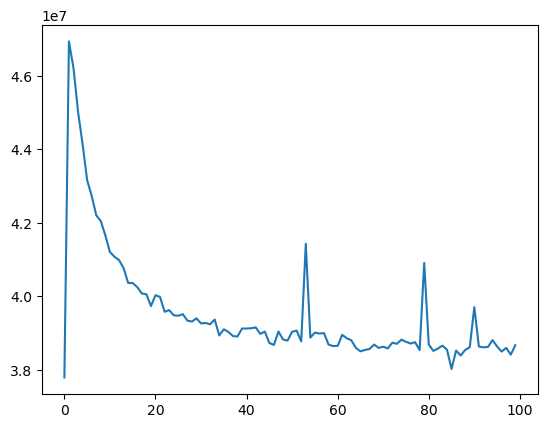

In [8]:
plt.plot(loss_list)

For comaprison, below is the loss plot when using default (larger) values for alpha. Note, that during training alpha is decreasing linearly from start value to end value. With default values in use the loss goes down near the end, once alpha gets smaller values.

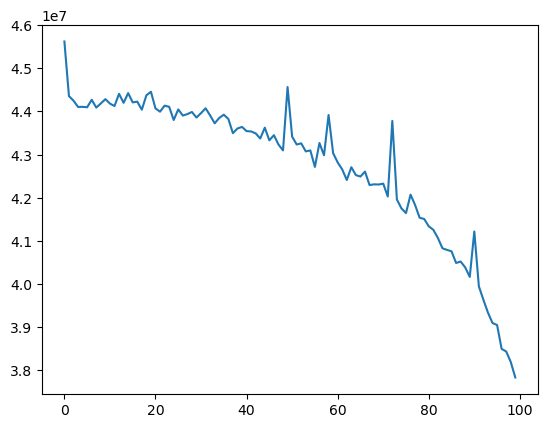

In [9]:
default_alpha_loss_list = [45621836.0, 44355904.0, 44249936.0, 44104492.0, 44107028.0, 44097436.0, 44270596.0, 44089604.0, 44185456.0, 44285424.0, 44182396.0, 44126032.0, 44408908.0, 44199988.0, 44425624.0, 44209516.0, 44227556.0, 44041368.0, 44373620.0, 44456688.0, 44070200.0, 43995008.0, 44134528.0, 44107632.0, 43802268.0, 44047244.0, 43904480.0, 43939264.0, 43987436.0, 43859148.0, 43961468.0, 44073332.0, 43907992.0, 43725336.0, 43849884.0, 43924944.0, 43826232.0, 43496588.0, 43605268.0, 43641544.0, 43543980.0, 43537204.0, 43491140.0, 43373268.0, 43624628.0, 43330720.0, 43449924.0, 43234040.0, 43097712.0, 44565932.0, 43416728.0, 43234072.0, 43260536.0, 43074152.0, 43096868.0, 42714596.0, 43268708.0, 42984456.0, 43917916.0, 43035192.0, 42818392.0, 42656488.0, 42411144.0, 42707748.0, 42523348.0, 42491780.0, 42605616.0, 42294312.0, 42310540.0, 42306532.0, 42327836.0, 42028380.0, 43780020.0, 41960848.0, 41753348.0, 41644528.0, 42072300.0, 41830796.0, 41535968.0, 41507712.0, 41336916.0, 41256888.0, 41069008.0, 40828812.0, 40791320.0, 40758012.0, 40487952.0, 40521400.0, 40385292.0, 40164828.0, 41217672.0, 39945608.0, 39633816.0, 39335348.0, 39096012.0, 39050096.0, 38497092.0, 38436708.0, 38193532.0, 37834140.0]
plt.plot(default_alpha_loss_list)

In [10]:
model.wv.most_similar('сабака', topn=20)

[('котка', 0.8674803376197815),
 ('кошка', 0.864650547504425),
 ('кот', 0.861745297908783),
 ('жывёліна', 0.8478010892868042),
 ('дзік', 0.8465594053268433),
 ('пацук', 0.8393999338150024),
 ('кацяня', 0.8384274244308472),
 ('сабачка', 0.824194610118866),
 ('конь', 0.8237901926040649),
 ('муха', 0.8178677558898926),
 ('малпа', 0.8122631311416626),
 ('воўк', 0.8108128905296326),
 ('шчанюк', 0.8072198629379272),
 ('звер', 0.8003535270690918),
 ('лісіца', 0.7995669841766357),
 ('авечка', 0.7984723448753357),
 ('асёл', 0.7966972589492798),
 ('мядзведзь', 0.794684886932373),
 ('каза', 0.7887024283409119),
 ('зграя', 0.7850828766822815)]

In [11]:
model.wv.index_to_key[:10]

['быць',
 'год',
 'беларускі',
 'беларусь',
 'чалавек',
 'магчы',
 'час',
 'усё',
 'дзень',
 'большыць']

In [12]:
# tsne for visualization
# plotly for interactivity https://towardsdatascience.com/how-to-train-a-word2vec-model-from-scratch-with-gensim-c457d587e031
# save filtered out wods into separat file to verify
# dont explicitly list stop words
# prepare assessment data (50 words with 10 most similar wods for them)
# remove words after training
# increase corpus
# increase dimensionality
# merge е/ё , e.g. пачуцце/пачуццё
# п'еса is split to 'п' і 'еса'

In [13]:
model.save("word2vec-100-bel-cc100.model")

INFO:gensim.utils:Word2Vec lifecycle event {'fname_or_handle': 'word2vec-100-bel-cc100.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-05-18T23:19:59.478852', 'gensim': '4.3.1', 'python': '3.11.3 | packaged by conda-forge | (main, Apr  6 2023, 09:05:00) [Clang 14.0.6 ]', 'platform': 'macOS-12.6-x86_64-i386-64bit', 'event': 'saving'}
INFO:gensim.utils:not storing attribute cum_table
INFO:gensim.utils:saved word2vec-100-bel-cc100.model


In [14]:
model.wv.save_word2vec_format('word2vec-100-bel-cc100.vectors')

INFO:gensim.models.keyedvectors:storing 79373x100 projection weights into word2vec-100-bel-cc100.vectors
